Chapter 09

# 一元高斯分布CDF
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码展示了正态分布累积分布函数 (CDF) 在不同均值 $\mu$ 和不同标准差 $\sigma$ 下的变化。

1. **CDF 随均值 $\mu$ 变化**：
   - 通过固定标准差 $\sigma=1$，设定 $X$ 的取值范围为 $[-5, 5]$，$\mu$ 的取值范围为 $[-2, 2]$，生成不同均值下的正态分布 CDF。
   - 累积分布函数 $F_X(x)$ 表达为：
     $$
     F_X(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(t - \mu)^2}{2\sigma^2}} \, dt
     $$
   - 通过网格数据 `XX` 和 `MM`，计算了对应于不同 $\mu$ 值下的 $F_X(x)$，并将其以 3D 网格和等高线的形式可视化。

2. **二维曲线图展示 CDF 随 $\mu$ 变化**：
   - 展示了不同均值 $\mu$ 的 $F_X(x)$ 曲线，图中标注了 $F_X(x) = 0.5$ 和 $F_X(x) = 1$ 的参考线。随着 $\mu$ 增加，曲线沿 $X$ 轴平移，但保持 CDF 的性质，即在 $x \to \infty$ 时趋于 $1$。

3. **CDF 随标准差 $\sigma$ 变化**：
   - 固定均值 $\mu=0$，设定标准差 $\sigma$ 在 $[0.5, 3]$ 的范围内变化。计算不同 $\sigma$ 值下的 CDF：
     $$
     F_X(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(t - \mu)^2}{2\sigma^2}} \, dt
     $$
   - 以 3D 图的形式显示不同 $\sigma$ 值下的 $F_X(x)$，并添加等高线以展示变化。

4. **二维曲线图展示 CDF 随 $\sigma$ 变化**：
   - 不同 $\sigma$ 下的 $F_X(x)$ 曲线表明，随着 $\sigma$ 增大，CDF 曲线的上升变得更缓慢（即，分布的扩散度增加）。图中同样标记了 $F_X(x) = 0.5$ 和 $F_X(x) = 1$ 的参考线。

此代码直观地展示了累积分布函数 $F_X(x)$ 随均值和标准差的变化方式，以及它如何受这两个参数的影响。

这段代码展示了正态分布的累积分布函数 (CDF) 在不同均值 $\mu$ 和标准差 $\sigma$ 下的变化。首先，代码绘制了随着均值变化的 CDF 图，再绘制了随着标准差变化的 CDF 图。通过三维网格图和二维曲线图直观展示了均值和标准差对 CDF 的影响。

### 正态分布的累积分布函数 (CDF)
对于正态分布的累积分布函数 $F_{X}(x)$，其公式为：
$$
F_{X}(x) = \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]
$$
其中 $\text{erf}$ 为误差函数。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # 导入颜色映射
from scipy.stats import norm

## 随均值变化的累积分布函数

In [2]:
X  = np.arange(-5, 5, 0.05)  # 创建 X 的线性空间
mu = np.arange(-2, 2, 0.2)  # 创建均值的线性空间

In [3]:
XX, MM = np.meshgrid(X, mu)  # 创建网格数据

In [4]:
sigma = 1  # 设置标准差

In [5]:
F_x_varying_mu = norm.cdf(XX, loc=MM, scale=sigma)  # 计算不同均值下的 CDF

## 绘制 3D 网格图

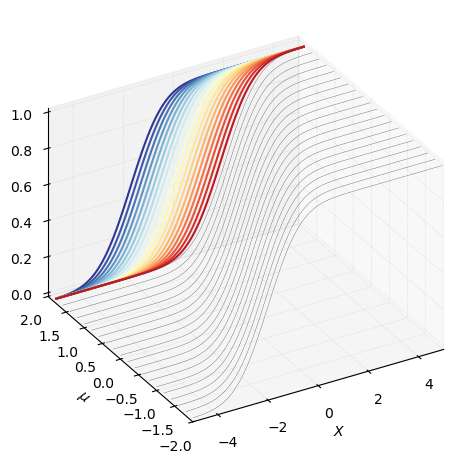

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')  # 创建3D子图

ax.plot_wireframe(XX, MM, F_x_varying_mu, rstride=1, cstride=0,
                  color = [0.3, 0.3, 0.3],
                  linewidth = 0.25)  # 绘制3D网格图

ax.contour(XX, MM, F_x_varying_mu, 
           levels = 20, zdir='y', \
            offset=mu.max(), cmap=cm.RdYlBu_r)  # 绘制投影等高线图

ax.set_xlabel(r'$X$')  # 设置 X 轴标签
ax.set_ylabel(r'$\mu$')  # 设置均值标签
ax.set_zlabel(r'$F_{X}(x)$')  # 设置 Z 轴标签

ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-5, 5)  # 设置 X 轴范围
ax.set_ylim(-2, 2)  # 设置 Y 轴范围
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形

## 绘制随均值变化的 2D 曲线图

(0.0, 0.9999999999981736)

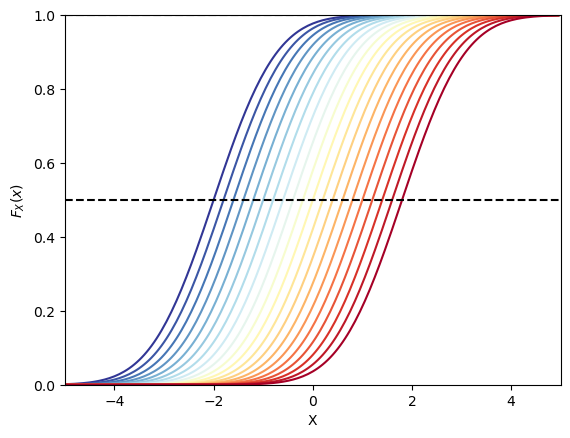

In [7]:
fig, ax = plt.subplots()  # 创建子图

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(mu)))  # 设置颜色渐变

for i in np.linspace(1, len(mu), len(mu)):  # 遍历不同均值
    plt.plot(X, F_x_varying_mu[int(i)-1, :],
             color = colors[int(i)-1])  # 绘制 CDF 曲线

plt.axhline(y = 0.5, color = 'k', linestyle = '--')  # 添加水平参考线 y=0.5
plt.axhline(y = 1,   color = 'k', linestyle = '--')  # 添加水平参考线 y=1

plt.xlabel('X')  # 设置 X 轴标签
plt.ylabel(r'$F_{X}(x)$')  # 设置 Y 轴标签
ax.set_xlim(-5, 5)  # 设置 X 轴范围
ax.set_ylim(0, F_x_varying_mu.max())  # 设置 Y 轴范围

## 随标准差变化的累积分布函数

In [8]:
X     = np.arange(-5, 5, 0.05)  # 创建 X 的线性空间
sigma = np.arange(0.5, 3, 0.1)  # 创建标准差的线性空间

In [9]:
XX, SS = np.meshgrid(X, sigma)  # 创建网格数据

In [10]:
mu = 0  # 设置均值

In [11]:
F_x_varying_sig = norm.cdf(XX, loc=mu, scale=SS)  # 计算不同标准差下的 CDF

## 绘制 3D 网格图

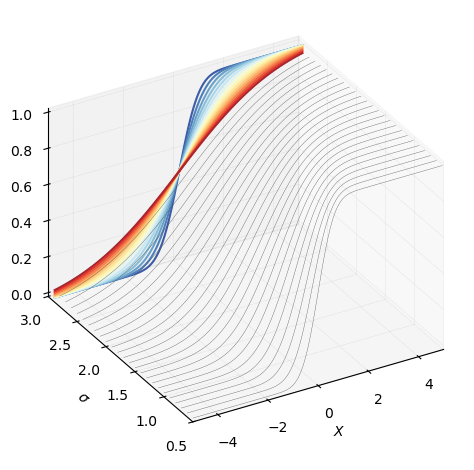

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')  # 创建3D子图

ax.plot_wireframe(XX, SS, F_x_varying_sig, rstride=1, cstride=0,
                  color = [0.3, 0.3, 0.3],
                  linewidth = 0.25)  # 绘制3D网格图

ax.contour(XX, SS, F_x_varying_sig, 
           levels = 20, zdir='y', \
            offset=sigma.max(), cmap=cm.RdYlBu_r)  # 绘制投影等高线图

ax.set_xlabel(r'$X$')  # 设置 X 轴标签
ax.set_ylabel(r'$\sigma$')  # 设置标准差标签
ax.set_zlabel(r'$F_{X}(x)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')
ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-5, 5)  # 设置 X 轴范围
ax.set_ylim(0.5, 3)  # 设置 Y 轴范围

ax.view_init(azim=-120, elev=30)  # 设置视角
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形

## 绘制随标准差变化的 2D 曲线图

(0.0, 0.9999999999981736)

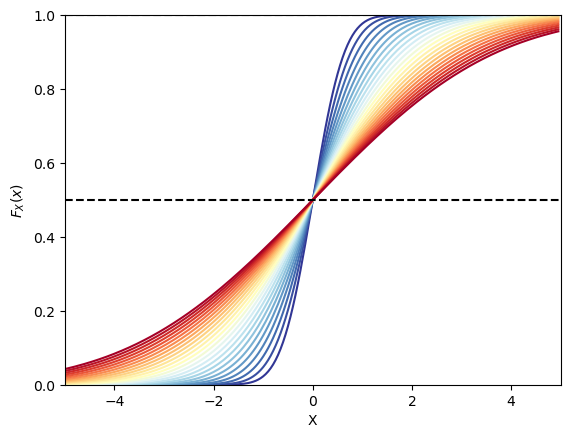

In [13]:
fig, ax = plt.subplots()  # 创建子图

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(sigma)))  # 设置颜色渐变

for i in np.linspace(1, len(sigma), len(sigma)):  # 遍历不同标准差
    plt.plot(X, F_x_varying_sig[int(i)-1, :],
             color = colors[int(i)-1])  # 绘制 CDF 曲线

plt.axhline(y = 0.5, color = 'k', linestyle = '--')  # 添加水平参考线 y=0.5
plt.axhline(y = 1,   color = 'k', linestyle = '--')  # 添加水平参考线 y=1

plt.xlabel('X')  # 设置 X 轴标签
plt.ylabel('$F_{X}(x)$')  # 设置 Y 轴标签
ax.set_xlim(-5, 5)  # 设置 X 轴范围
ax.set_ylim(0, F_x_varying_mu.max())  # 设置 Y 轴范围